# Comparing Graph Convolutional Networks
    - Matt Robinson
    
This notebook shows the code to repreduce the plots comparing our graph convolutional network (GCN) with DeepChem's implementation:

### First Compile Data: ###

#### The JAK3 Dataset #### 
(size of test set: N=180)

Our accuracy: 0.806 <br>
DeepChem accuracy: 0.756

We need error bars for accuracy, since our estimate can be quite sensitive to the train/test split and/or model initialization. We will get the confidence interval using the normal approximation, as explained by Raschka in https://arxiv.org/abs/1811.12808. This makes the assumption that the predictions follow a normal distribution.

Our confidence interval is given by 

$$
A C C_{S} \pm z \sqrt{\frac{1}{n} A C C_{S}\left(1-A C C_{S}\right)}
$$

where $A C C_{S}$ is the accuracy on the set $S$ and $z$ is the $(1-\frac{\alpha}{2})$ quantile of a standard normal distribution. For a 95% CI, we set $z=1.96$:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
def CI(acc, N):
    lower_limit = acc - 1.96*np.sqrt(acc*(1-acc)*(1/N))
    upper_limit = acc + 1.96*np.sqrt(acc*(1-acc)*(1/N))
    return lower_limit, upper_limit    

In [4]:
# our CI
CI(0.806, 180)

(0.7482318839189337, 0.8637681160810664)

In [5]:
# their CI
CI(0.756, 180)

(0.693255504783288, 0.818744495216712)

Now we also need the AUC data:

Our AUC: mean = 0.798, CI = (0.734, 0.856) <br>
DeepChem AUC: mean = 0.776, CI = (0.716, 0.840)

In [95]:
# create pandas dataframe for use with altair
jak3_df = pd.DataFrame(columns=['mean', 'lower_CI', 'upper_CI', 'method', 'metric'])

In [96]:
jak3_df = jak3_df.append({'mean':0.806,
                'lower_CI':0.748,
                'upper_CI':0.864,
                'method':'mygcn',
                'metric':'Accuracy'}, ignore_index=True)

jak3_df = jak3_df.append({'mean':0.756,
                'lower_CI':0.693,
                'upper_CI':0.819,
                'method':'DC',
                'metric':'Accuracy'}, ignore_index=True)

jak3_df = jak3_df.append({'mean':0.798,
                'lower_CI':0.734,
                'upper_CI':0.856,
                'method':'mygcn',
                'metric':'AUC'}, ignore_index=True)

jak3_df = jak3_df.append({'mean':0.776,
                'lower_CI':0.716,
                'upper_CI':0.840,
                'method':'DC',
                'metric':'AUC'}, ignore_index=True)


In [97]:
jak3_df

,mean,lower_CI,upper_CI,method,metric
0,0.806,0.748,0.864,mygcn,Accuracy
1,0.756,0.693,0.819,DC,Accuracy
2,0.798,0.734,0.856,mygcn,AUC
3,0.776,0.716,0.840,DC,AUC


In [98]:
import altair as alt
alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

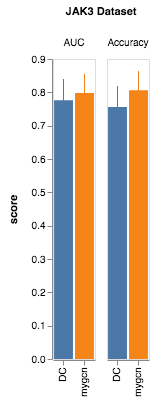

In [99]:
source = jak3_df

bars = alt.Chart().mark_bar().encode(
    x= alt.X('method:O',axis=alt.Axis(title='') ),
    y= alt.Y('mean:Q', axis=alt.Axis(title='score', grid=False)),
    color= alt.Color('method:N',legend=None),
)

CI_bars = bars.mark_rule(color='black').encode(
    x="method:O",
    y="lower_CI:Q",
    y2="upper_CI:Q",
)

alt.layer(bars, CI_bars, data=source).facet(
    column= alt.Column('metric:N', title='JAK3 Dataset',
                       header=alt.Header(
                           titleBaseline='bottom',
                           titleFontWeight='bold'))
)

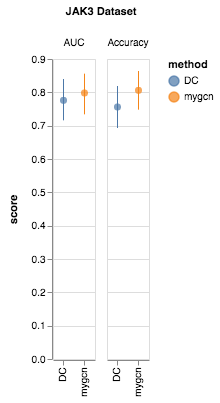

In [100]:
source = jak3_df

points = alt.Chart().mark_point(filled=True, size=50).encode(
    x= alt.X('method:O',axis=alt.Axis(title='') ),
    y= alt.Y('mean:Q', axis=alt.Axis(title='score', grid=True)),
    color = 'method:N'
)

CI_bars = points.mark_rule().encode(
    x="method:O",
    y="lower_CI:Q",
    y2="upper_CI:Q",
)


alt.layer(points, CI_bars, data=source).facet(
    column= alt.Column('metric:N', title='JAK3 Dataset')
)

#### Solubility Dataset ####

(size of test set: N=257)

Our accuracy: 0.770 <br>
DeepChem accuracy: 0.770

In [101]:
# both CIs
CI(0.770, 257)

(0.7185484111788771, 0.8214515888211229)

Now we also need the AUC data:

Our AUC: mean = 0.916, CI = (0.901, 0.931) <br>
DeepChem AUC: mean = 0.916, CI = (0.900, 0.931)

In [102]:
# create pandas dataframe for use with altair
sol_df = pd.DataFrame(columns=['mean', 'lower_CI', 'upper_CI', 'method', 'metric'])

In [103]:
sol_df = sol_df.append({'mean':0.770,
                'lower_CI':0.719,
                'upper_CI':0.821,
                'method':'mygcn',
                'metric':'Accuracy'}, ignore_index=True)

sol_df = sol_df.append({'mean':0.770,
                'lower_CI':0.719,
                'upper_CI':0.821,
                'method':'DC',
                'metric':'Accuracy'}, ignore_index=True)

sol_df = sol_df.append({'mean':0.916,
                'lower_CI':0.901,
                'upper_CI':0.931,
                'method':'mygcn',
                'metric':'AUC'}, ignore_index=True)

sol_df = sol_df.append({'mean':0.916,
                'lower_CI':0.900,
                'upper_CI':0.931,
                'method':'DC',
                'metric':'AUC'}, ignore_index=True)


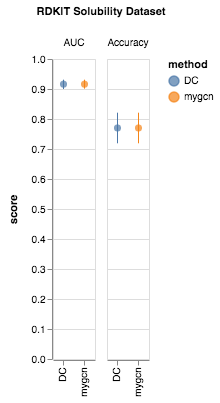

In [104]:
source = sol_df

points = alt.Chart().mark_point(filled=True, size=50).encode(
    x= alt.X('method:O',axis=alt.Axis(title='') ),
    y= alt.Y('mean:Q', axis=alt.Axis(title='score', grid=True)),
    color = 'method:N'
)

CI_bars = points.mark_rule().encode(
    x="method:O",
    y="lower_CI:Q",
    y2="upper_CI:Q",
)


alt.layer(points, CI_bars, data=source).facet(
    column= alt.Column('metric:N', title='RDKIT Solubility Dataset')
)